Using the [auto-mpg-dataset](https://assets.datacamp.com/production/repositories/1796/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv) from THE UCI Machine Learning Repository we will train a DecisionTreeRegressor to predict a continuous variable: mpg (mile per gallon)

This notebook is a [DataCamp](https://learn.datacamp.com/) exercise

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv')

In [3]:
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


In [5]:
df.describe()

,mpg,displ,hp,weight,accel,size
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327,13.679847
std,7.805007,104.644004,38.491160,849.402560,2.758864,4.264458
min,9.000000,68.000000,46.000000,1613.000000,8.000000,7.500000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000,10.000000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000,10.000000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000,20.000000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,20.000000


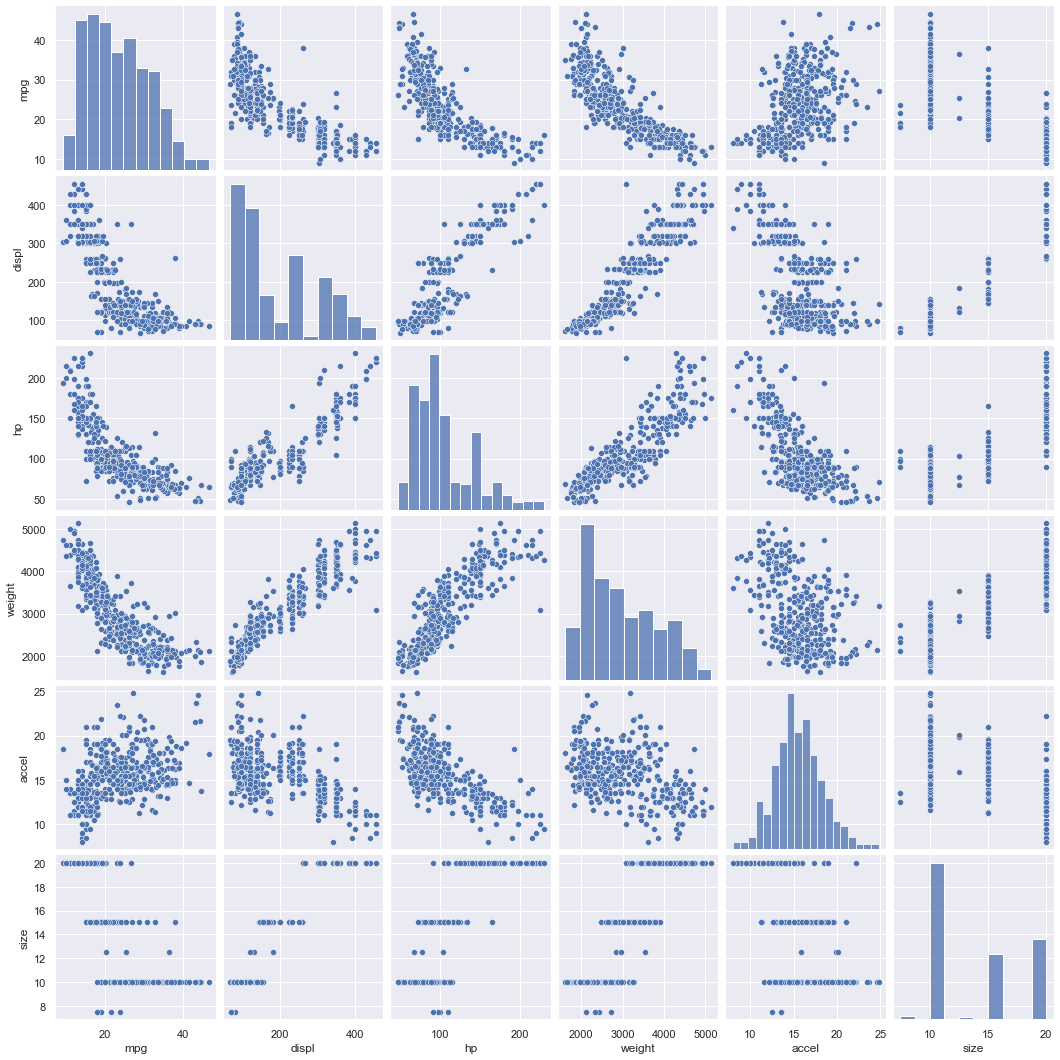

In [6]:
# Plot out pairplots for the six features using the mpg as the target
sns.set_theme()
sns.pairplot(df)

In looking at mpg vs. other features it appears it non-linear with respect to 'displ', 'hp' and 'weight'

## Train regression tree on all six available features

In [7]:
X = df.drop(['mpg','origin'], axis=1)
y = df['mpg']

In [8]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Instantiate decision tree model with minimum sample size in a leaf at 13% of data with max_depth of nodes at 8
dt = DecisionTreeRegressor(max_depth=8,
                          min_samples_leaf=0.13,
                          random_state=3)

In [10]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [11]:
# Compute y_pred
y_pred = dt.predict(X_test)

In [12]:
# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

In [13]:
# Print rmse_dt
print(f"Test set RMSE of dt: {round(rmse_dt,2)}")

Test set RMSE of dt: 4.82


## Compare regression tree vs. Linear regression

In [14]:
# First train a LinearRegressor model on the same data
lr = LinearRegression()

In [15]:
# Fit lr to the same training set
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict the test set labels for lr
y_pred_lr = lr.predict(X_test)

In [17]:
# Compute the mse_lr
mse_lr = MSE(y_test, y_pred_lr)

In [18]:
# Compute the rmse_lr
rmse_lr = mse_lr**(1/2)

In [19]:
# Print the rmse_lr vs. the rmse_dt
print(f"For the test set:\n Linear Regression RMSE: {rmse_lr}\n Regression Tree RMSE: {rmse_dt}")

For the test set:
 Linear Regression RMSE: 4.339204799031584
 Regression Tree RMSE: 4.818124210449816


## Use Cross validation to tune Tree models

Note that since `cross_val_score` has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs. The CV RMSE can then be obtained by computing the square root of the average MSE.

In [20]:
# Import cross_val_score - 
from sklearn.model_selection import cross_val_score

In [21]:
# Create new train / test / split with a 30% test and 70% train
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Start with max_depth = 4 and min_samples_leaf = 26%
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=42)

In [23]:
# Evaluate the list of MSE obtained by 10-fold Cross Validation (CV)
# Set n_jobs to -1 in order to exploit all CPU cores in the computation
MSE_CV = - cross_val_score(dt, X_train, y_train, cv=10,
                          scoring='neg_mean_squared_error',
                          n_jobs= -1)

In [24]:
MSE_CV

array([30.62575665, 29.77115456, 22.49755824, 31.15480755, 23.15412954,
       17.68250548, 34.23100253, 24.93986684, 14.23236065, 36.86416215])

In [25]:
# Compute the 10-fold CV RMSE
RMSE_CV = (MSE_CV.mean())**(1/2)
RMSE_CV

5.1493038772007065

In [26]:
# Fit 'dt' model to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=42)

In [27]:
# Predict the labels of the training set
y_predict_train = dt.predict(X_train)

In [28]:
# Predict the labels of the test set 
y_predict_test = dt.predict(X_test)

In [29]:
# Review the CV MSE, training set MSE and test set MSE
print(f"CV MSE: {MSE_CV.mean()}")
print(f"Training set MSE: {MSE(y_train, y_predict_train)}")
print(f"Test set MSE: {MSE(y_test, y_predict_test)}")

CV MSE: 26.515330419754225
Training set MSE: 21.035706032815522
Test set MSE: 22.46718765950577


In [30]:
# Review the CV RMSE, training set RMSE and test set RMSE
print(f"CV RMSE: {(MSE_CV.mean())**(1/2)}")
print(f"Training set RMSE: {(MSE(y_train, y_predict_train))**(1/2)}")
print(f"Test set RMSE: {(MSE(y_test, y_predict_test))**(1/2)}")

CV RMSE: 5.1493038772007065
Training set RMSE: 4.58646988792203
Test set RMSE: 4.739956503967707


The error of the test set is slightly larger than the training set but less than the CV error. This indicates that the model slightly overfits the data with a high variance and we could try to improve it by reducing the model complexity.

## Tune the dt model by reducing the complexity - set min_samples_leaf = 0.20

In [31]:
# Start with max_depth = 4 and min_samples_leaf = 26%
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.20, random_state=42)

In [32]:
# Evaluate the list of MSE obtained by 10-fold Cross Validation (CV)
# Set n_jobs to -1 in order to exploit all CPU cores in the computation
MSE_CV = - cross_val_score(dt, X_train, y_train, cv=10,
                          scoring='neg_mean_squared_error',
                          n_jobs= -1)

In [33]:
MSE_CV

array([26.01834307, 23.57313887, 10.9533318 , 33.01091158, 22.27085539,
       14.40489738, 17.64762123, 30.95337193, 10.81269869, 19.21699713])

In [34]:
# Compute the 10-fold CV RMSE
RMSE_CV = (MSE_CV.mean())**(1/2)
RMSE_CV

4.57014405737027

In [35]:
# Fit 'dt' model to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.2, random_state=42)

In [36]:
# Predict the labels of the training set
y_predict_train = dt.predict(X_train)

In [37]:
# Predict the labels of the test set 
y_predict_test = dt.predict(X_test)

In [38]:
# Review the CV MSE, training set MSE and test set MSE
print(f"CV MSE: {MSE_CV.mean()}")
print(f"Training set MSE: {MSE(y_train, y_predict_train)}")
print(f"Test set MSE: {MSE(y_test, y_predict_test)}")

CV MSE: 20.886216705116794
Training set MSE: 16.573182758666537
Test set MSE: 18.510547716603494


In [39]:
# Review the CV RMSE, training set RMSE and test set RMSE
print(f"CV RMSE: {(MSE_CV.mean())**(1/2)}")
print(f"Training set RMSE: {(MSE(y_train, y_predict_train))**(1/2)}")
print(f"Test set RMSE: {(MSE(y_test, y_predict_test))**(1/2)}")

CV RMSE: 4.57014405737027
Training set RMSE: 4.071017410754532
Test set RMSE: 4.302388605949432


Setting the min_leaf_size to 0.20 from 0.26 improved the RMSE of the test set from 4.74 to 4.30

## What if we went the other direction? If we increased the model complexity?

In [40]:
# Start with max_depth = 6 and min_samples_leaf = 16%
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.10, random_state=42)

In [41]:
# Evaluate the list of MSE obtained by 10-fold Cross Validation (CV)
# Set n_jobs to -1 in order to exploit all CPU cores in the computation
MSE_CV = - cross_val_score(dt, X_train, y_train, cv=10,
                          scoring='neg_mean_squared_error',
                          n_jobs= -1)

In [42]:
MSE_CV

array([23.32382832, 21.89609595,  7.9547366 , 29.91436523, 20.41472472,
       12.22397752, 13.94208399, 26.91498254,  5.66462221, 24.50547179])

In [43]:
# Compute the 10-fold CV RMSE
RMSE_CV = (MSE_CV.mean())**(1/2)
RMSE_CV

4.32151465190138

In [44]:
# Fit 'dt' model to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.1, random_state=42)

In [45]:
# Predict the labels of the training set
y_predict_train = dt.predict(X_train)

In [46]:
# Predict the labels of the test set 
y_predict_test = dt.predict(X_test)

In [47]:
# Review the CV MSE, training set MSE and test set MSE
print(f"CV MSE: {MSE_CV.mean()}")
print(f"Training set MSE: {MSE(y_train, y_predict_train)}")
print(f"Test set MSE: {MSE(y_test, y_predict_test)}")

CV MSE: 18.675488886598302
Training set MSE: 14.631201774045362
Test set MSE: 16.658724402378382


In [48]:
# Review the CV RMSE, training set RMSE and test set RMSE
print(f"CV RMSE: {(MSE_CV.mean())**(1/2)}")
print(f"Training set RMSE: {(MSE(y_train, y_predict_train))**(1/2)}")
print(f"Test set RMSE: {(MSE(y_test, y_predict_test))**(1/2)}")

CV RMSE: 4.32151465190138
Training set RMSE: 3.8250753945569964
Test set RMSE: 4.081510063981024


This is an unexpected result: by increasing the model complexity we have IMPROVED the RMSE fo the test set and it is still below the CV RMSE. 

## Random Forest Regressor

In [49]:
# Import dependencies
from sklearn.ensemble import RandomForestRegressor

In [50]:
# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=42)

In [51]:
# Instantiate a random forests regressor 'rf' with 400 estimators
rf = RandomForestRegressor(n_estimators=400,
                          min_samples_leaf=0.12,
                          random_state=42)

In [52]:
# Fit 'rf' to the training set
rf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=0.12, n_estimators=400, random_state=42)

In [53]:
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

In [54]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

In [56]:
# Pring the test set RMSE
print(f"Test set RMSE of rf: {rmse_test:.2f}")

Test set RMSE of rf: 3.78


## Review the feature importance by accessing feature_importances_

In [57]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)

In [58]:
# Sort the importances_rf
sorted_importances_rf = importances_rf.sort_values()

<AxesSubplot:>

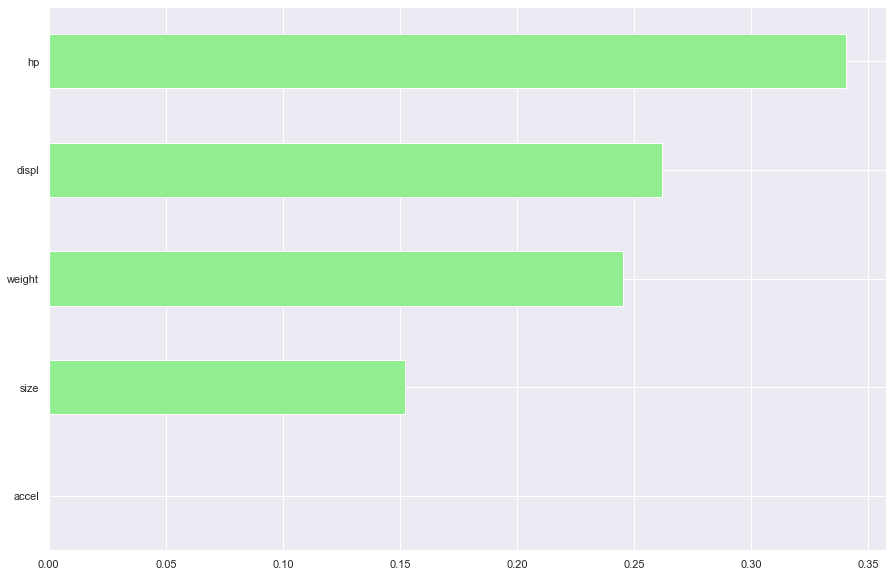

In [60]:
# Make a horizontal bar plot
fig, ax = plt.subplots(figsize=(15,10))
sorted_importances_rf.plot(kind='barh', color='lightgreen')

## Gradient Boosting Regressor

In [61]:
# Import dependencies
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=42)

In [63]:
# Instantiate a GradientBoostingRegressor 'gbt'
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=42)

In [64]:
# Fit 'gbt' to the training set
gbt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=300, random_state=42)

In [65]:
# Predict the test set labels
y_pred_gbt = gbt.predict(X_test)

In [66]:
# Evaluate the test set RMSE
rmse_test_gbt = MSE(y_test, y_pred_gbt)**(1/2)

In [67]:
# Print the test set RMSE
print(f"gbt Test set RMSE: {rmse_test_gbt:.2f}")

gbt Test set RMSE: 3.94


The Gradient Boosting Regressor had a higher RMSE than the Random Forest Regressor 3.94 vs. 3.78 respectively